# Emotions Detection in Text

In [1]:
# EDA
#pip install numpy
#pip install seaborn
#pip install neattext
#pip install scikit-learn


import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
#possibility of a textbox for inputing data through the machine
#maybe from the stress model
#df

In [2]:
# Load Dataset
df = pd.read_csv("../data/emotion_dataset_raw.csv")

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
# Value Counts
#whole data
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

In [5]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

#textbox that saves the data (text inserted) into a data frame called df that then runs through sentiment analysis
#And then a chart with alignment

# Create a textbox widget
text_box = widgets.Textarea(
    value="Type your input text here...",
    placeholder="Enter text here...",
    description="Input:",
    layout=widgets.Layout(width='500px', height='100px')
)

# Create an output widget
output = widgets.Output()

# Display the textbox
display(text_box, output)

# Function to process the input and store in a DataFrame
def process_input(change):
    # Capture the input text from the textbox
    input_text = change['new']
    # Split text by new lines or commas
    rows = [row.strip() for row in input_text.split(",") if row.strip()]
    # Create a DataFrame
    global df  # Make it accessible globally if needed
    df = pd.DataFrame({"Text": rows})
    
    # Show the DataFrame in the output widget
    with output:
        output.clear_output()  # Clear previous output
        print("DataFrame created:")
        display(df)

# Attach the function to the textbox
text_box.observe(process_input, names="value")



Textarea(value='Type your input text here...', description='Input:', layout=Layout(height='100px', width='500p…

Output()

In [ ]:
#build model that can run sentiment analysis on inputted data

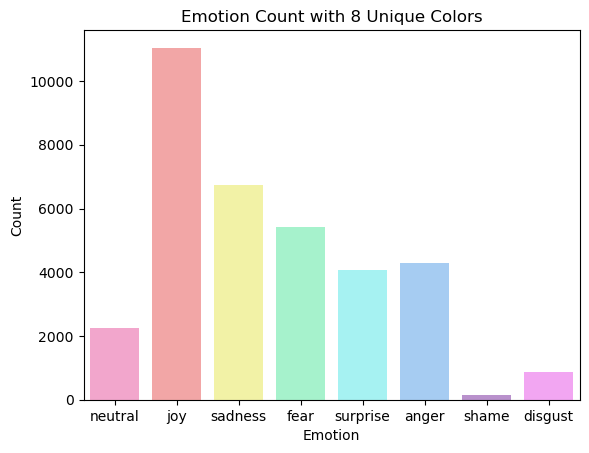

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the number of unique categories in the 'Emotion' column
unique_emotions = df['Emotion'].nunique()

# Ensure we have exactly 8 unique bright colors
bright_colors = ['#ff99cc', '#ff9999', '#FFFF99', '#99ffcc', '#99FFFF', '#99CCFF', '#bc87d6', '#FF99FF']

# Create the plot
sns.countplot(x='Emotion', data=df, palette= bright_colors, hue='Emotion', dodge=False)
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.title("Emotion Count with 8 Unique Colors")
plt.xlabel("Emotion")
plt.ylabel("Count")

# Display the plot
plt.show()



#measure how accurate is this? How do we measure that? How does one quantify emotion? 

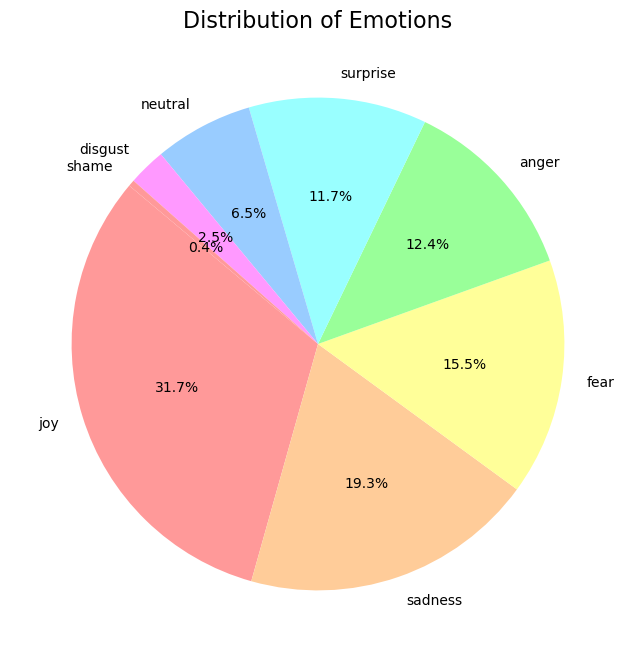

In [7]:
import matplotlib.pyplot as plt

# Calculate the counts of each emotion
emotion_counts = df['Emotion'].value_counts()

# Define a list of bright and happy colors
bright_colors = ['#FF9999', '#FFCC99', '#FFFF99', '#99FF99', '#99FFFF', '#99CCFF', '#FF99FF']

# Plot a pie chart with the bright colors
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_counts, 
    labels=emotion_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=bright_colors[:len(emotion_counts)]  # Adjust color list to match the number of categories
)
plt.title("Distribution of Emotions", fontsize=16)
plt.show()



In [ ]:
#Build a sentiment analysis based on Ekman for base emotion

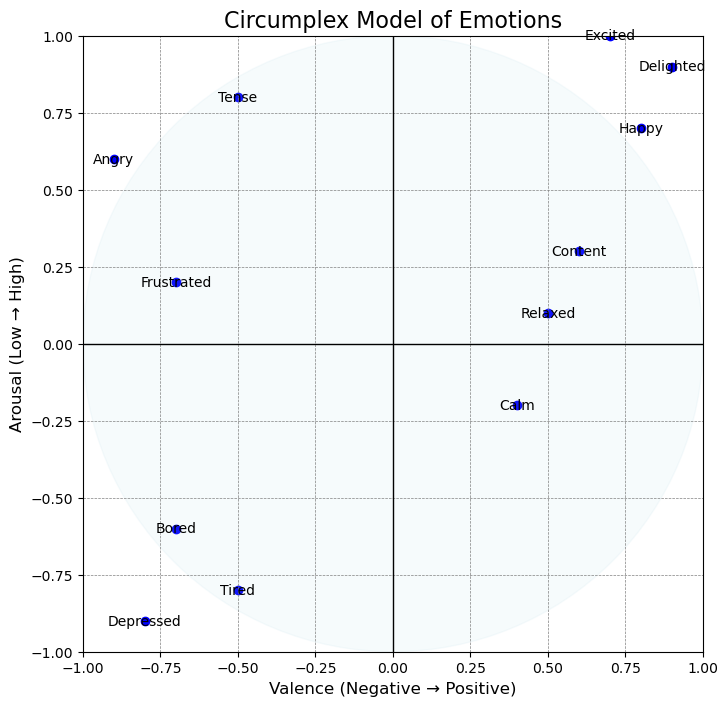

In [8]:
import matplotlib.pyplot as plt

# Data for emotions with their Valence (x-axis) and Arousal (y-axis) values
emotions = {
    "Happy": (0.8, 0.7),
    "Delighted": (0.9, 0.9),
    "Excited": (0.7, 1.0),
    "Content": (0.6, 0.3),
    "Relaxed": (0.5, 0.1),
    "Calm": (0.4, -0.2),
    "Tired": (-0.5, -0.8),
    "Bored": (-0.7, -0.6),
    "Depressed": (-0.8, -0.9),
    "Frustrated": (-0.7, 0.2),
    "Angry": (-0.9, 0.6),
    "Tense": (-0.5, 0.8)
}

# Create a plot
plt.figure(figsize=(8, 8))

# Draw axes
plt.axhline(0, color='black', linewidth=1)  # Horizontal axis (Valence)
plt.axvline(0, color='black', linewidth=1)  # Vertical axis (Arousal)

# Plot emotions
for emotion, (x, y) in emotions.items():
    plt.scatter(x, y, label=emotion, color="blue")  # Plot each point
    plt.text(x, y, emotion, fontsize=10, ha='center', va='center')  # Add emotion label

# Add labels for axes
plt.title("Circumplex Model of Emotions", fontsize=16)
plt.xlabel("Valence (Negative → Positive)", fontsize=12)
plt.ylabel("Arousal (Low → High)", fontsize=12)

# Customize the plot
plt.xlim(-1, 1)  # Limit for the Valence axis
plt.ylim(-1, 1)  # Limit for the Arousal axis
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Add a circular boundary for aesthetic
circle = plt.Circle((0, 0), 1, color='lightblue', fill=True, alpha=0.1)
plt.gca().add_artist(circle)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
emotion_mapping = {
    "joy": (0.8, 0.7),
    "sadness": (-0.8, -0.6),
    "neutral": (0.0, 0.0),
    "anger": (-0.7, 0.8),
    "fear": (-0.9, 0.9),
    "disgust": (-0.6, 0.4),
    "surprise": (0.7, 0.9),
    # Add other emotions based on your dataset if needed
}
# Map Valence and Arousal values
df["Valence"] = df["Emotion"].map(lambda x: emotion_mapping.get(x, (0, 0))[0])
df["Arousal"] = df["Emotion"].map(lambda x: emotion_mapping.get(x, (0, 0))[1])

# Check the updated DataFrame
print(df.head())

# Create the plot
plt.figure(figsize=(8, 8))

# Draw axes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Plot each emotion
for _, row in df.iterrows():
    plt.scatter(row["Valence"], row["Arousal"], color="blue", s=50, alpha=0.6)
    plt.text(row["Valence"], row["Arousal"], row["Emotion"], fontsize=9, ha='center', va='center')

# Add labels and title
plt.title("Circumplex Model of Emotions", fontsize=16)
plt.xlabel("Valence (Negative → Positive)", fontsize=12)
plt.ylabel("Arousal (Low → High)", fontsize=12)

# Set axis limits and grid
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Add a circular boundary
circle = plt.Circle((0, 0), 1, color='lightblue', fill=True, alpha=0.1)
plt.gca().add_artist(circle)

# Show the plot
plt.show()


In [ ]:
# Data Cleaning
dir(nfx)

In [ ]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [12]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

## We are not removing Special Characters as some of the rows have just Special Characters and it'll result into empty row.

In [13]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [ ]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

# It is advisable to split before applying pipelines because it prevents data leakage.

In [ ]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

In [ ]:
pipe_lr

In [26]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

#how do we test accuracy? how do they test accuracy?

0.6197547422877946

In [ ]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [ ]:
pipe_lr.predict([ex1])

In [ ]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

In [ ]:
# To Know the classes
pipe_lr.classes_

In [ ]:
# Save Model & Pipeline
import joblib
pipeline_file = open("../models/emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
import neattext.functions as nfx
import pandas as pd

# Example dataset
data = {
    "Text": ["I am so happy today!", "This is terrible news.", "I feel so angry right now!"],
    "Emotion": ["joy", "sadness", "anger"]
}
df = pd.DataFrame(data)

# Clean the text
df['Cleaned_Text'] = df['Text'].apply(nfx.remove_punctuations)
df['Cleaned_Text'] = df['Cleaned_Text'].apply(nfx.remove_stopwords)

from sklearn.preprocessing import LabelEncoder

# Encode emotions
le = LabelEncoder()
df['Emotion_Encoded'] = le.fit_transform(df['Emotion'])

# View the mapping
emotion_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Emotion Mapping:", emotion_mapping)


from sklearn.model_selection import train_test_split

X = df['Cleaned_Text']
y = df['Emotion_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

from sklearn.metrics import classification_report, accuracy_score

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Predict emotion for a new text
new_text = ["I am feeling amazing today!"]
new_text_tfidf = vectorizer.transform(new_text)
predicted_emotion = le.inverse_transform(model.predict(new_text_tfidf))

print("Predicted Emotion:", predicted_emotion[0])

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Emotion', data=df, palette='bright')
plt.title("Emotion Distribution")
plt.show()

